In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np


In [2]:
%matplotlib inline

In [3]:
sns.set(rc={'figure.figsize': (11.7, 8.27)}, style="white", color_codes=True)
plt.rc('pdf', fonttype=42)  # Embed font

In [4]:
def load_build_df(filename, collection, convert_units=True):
    build_df = pd.read_csv(filename, index_col=None)
    build_df.drop(['bytes_per_second', 'items_per_second',
                 'label', 'error_occurred', 'error_message' ], axis=1, inplace=True)
    build_df['collection'] = collection
    if convert_units:
        build_df.cpu_time = build_df.cpu_time/(10**9)  # ns to s
        build_df.real_time = build_df.real_time/(10**9)
        build_df.TotalBytes =  build_df.TotalBytes/1024/1024 # B to MB
        build_df.TotalBytesRate = build_df.TotalBytesRate/1024/1024 # B to MB
    return build_df

In [5]:
build_wiki = load_build_df('../../export/data/build-times_wiki.csv', 'wiki')
build_cweb = load_build_df('../../export/data/build-times_cweb.csv', 'cweb')
build_bing = load_build_df('../../export/data/build-times_bing.csv', 'bing')

In [6]:
combined_build = build_wiki.append(build_cweb, ignore_index=True).append(build_bing, ignore_index=True)


In [7]:
def total_build_time(combined_build):
    max_idx = combined_build.groupby(['name', 
                 'collection'])['nrows'].transform(max) == combined_build['nrows']
    return combined_build[max_idx]

In [8]:
tbuild_df = total_build_time(combined_build)

In [9]:
tbf_sel = tbuild_df[['name', 'collection', 'cpu_time', 'TotalBytes', 'TotalBytesRate']]

In [10]:
print(tbf_sel.to_latex(index=None))

\begin{tabular}{llrrr}
\toprule
        name & collection &    cpu\_time &   TotalBytes &  TotalBytesRate \\
\midrule
  BuildHTrie &       wiki &     5.53125 &   106.706619 &       19.291496 \\
 BuildMarisa &       wiki &    16.85940 &   106.706619 &        6.329193 \\
   BuildDAWG &       wiki &    43.89060 &   106.706619 &        2.431183 \\
 BuildIncNgT &       wiki &   680.29700 &   106.706619 &        0.156853 \\
  BuildHTrie &       cweb &   152.40600 &  3332.662582 &       21.866989 \\
 BuildMarisa &       cweb &   634.00000 &  3332.662582 &        5.256567 \\
   BuildDAWG &       cweb &  1176.81000 &  3332.662582 &        2.831936 \\
 BuildIncNgT &       cweb &  7289.16000 &   894.559860 &        0.122725 \\
  BuildHTrie &       bing &     8.07812 &   302.603722 &       37.459660 \\
 BuildMarisa &       bing &    46.62500 &   302.603722 &        6.490154 \\
   BuildDAWG &       bing &    80.73440 &   302.603722 &        3.748140 \\
 BuildIncNgT &       bing &  1891.42000 &   30

In [11]:
tbf_sel

,name,collection,cpu_time,TotalBytes,TotalBytesRate
14,BuildHTrie,wiki,5.53125,106.706619,19.291496
29,BuildMarisa,wiki,16.85940,106.706619,6.329193
44,BuildDAWG,wiki,43.89060,106.706619,2.431183
59,BuildIncNgT,wiki,680.29700,106.706619,0.156853
78,BuildHTrie,cweb,152.40600,3332.662582,21.866989
97,BuildMarisa,cweb,634.00000,3332.662582,5.256567
116,BuildDAWG,cweb,1176.81000,3332.662582,2.831936
133,BuildIncNgT,cweb,7289.16000,894.559860,0.122725
149,BuildHTrie,bing,8.07812,302.603722,37.459660
165,BuildMarisa,bing,46.62500,302.603722,6.490154


# Build time vs collection size

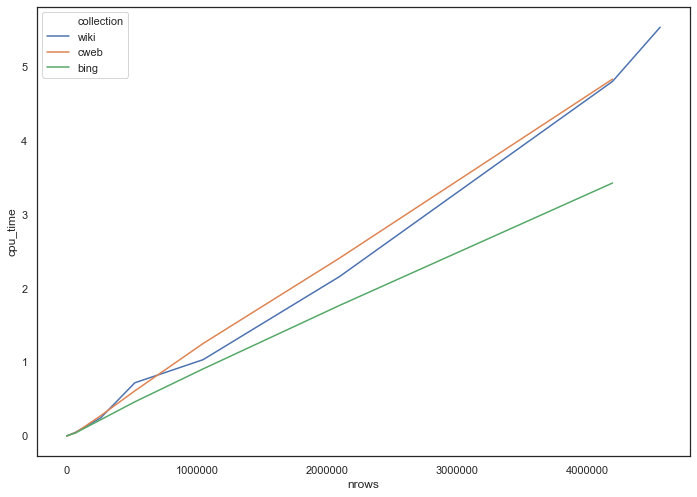

In [12]:
slice_df = combined_build[(combined_build.name == 'BuildHTrie') & (combined_build.nrows <= 5000000)]
sns.lineplot(x="nrows", y="cpu_time", hue="collection", data=slice_df)

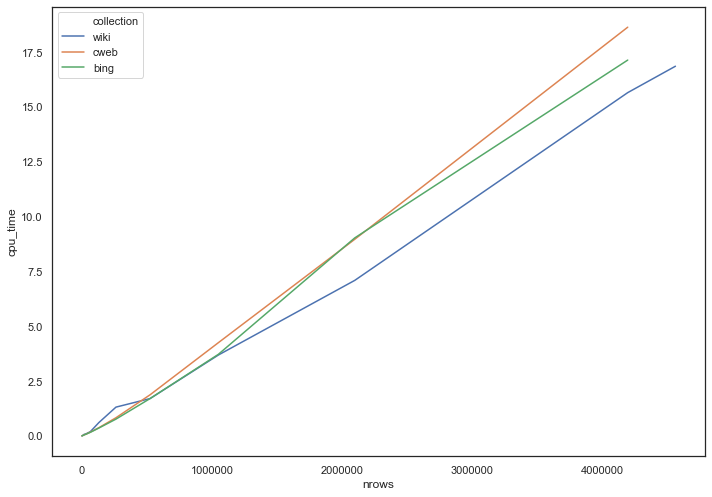

In [13]:
slice_df = combined_build[(combined_build.name == 'BuildMarisa') & (combined_build.nrows <= 5000000)]
sns.lineplot(x="nrows", y="cpu_time", hue="collection", data=slice_df)

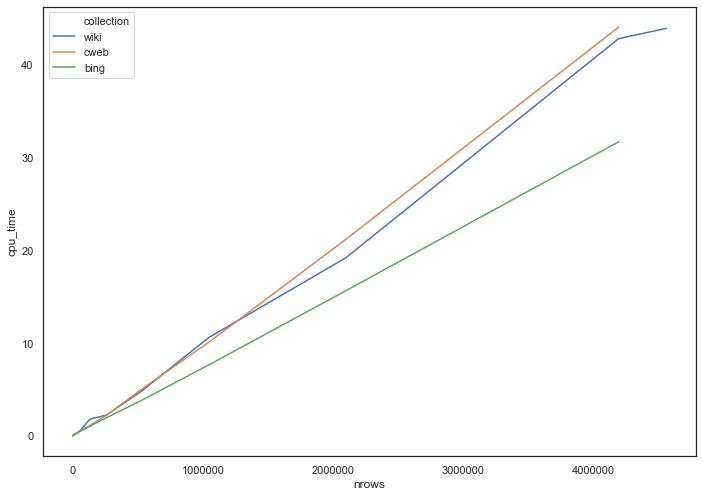

In [14]:
slice_df = combined_build[(combined_build.name == 'BuildDAWG') & (combined_build.nrows <= 5000000)]
sns.lineplot(x="nrows", y="cpu_time", hue="collection", data=slice_df)

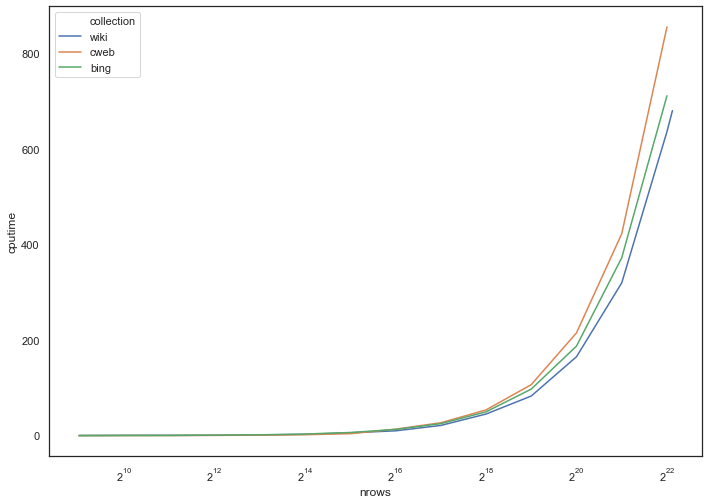

In [15]:
slice_df = combined_build[(combined_build.name == 'BuildIncNgT') & (combined_build.nrows <= 5000000)]
slice_df.columns = [u'name', u'nrows', u'iterations', u'real_time', u'cputime',
       u'time_unit', u'NPQ', u'PQByesInvRate', u'PQBytes', u'PQBytesRate',
       u'TotalByesInvRate', u'TotalBytes', u'TotalBytesRate', u'collection']

ax = sns.lineplot(x="nrows", y="cputime", hue="collection", data=slice_df)
# xticks = slice_df.nrows.unique()
# xticks = sorted(xticks)
# ax.xaxis.set_ticks(xticks)
ax.set_xscale('log', basex=2)
plt.show()

In [16]:
def plot_buildtime_nrows(combined_build, impl, cutoff_nrows=5000000):
    slice_df = combined_build[(combined_build.name == impl) & (combined_build.nrows <= cutoff_nrows)]
    sns.lineplot(x="nrows", y="cpu_time", hue="collection", data=slice_df)
    sns.despine()
    plt.show()


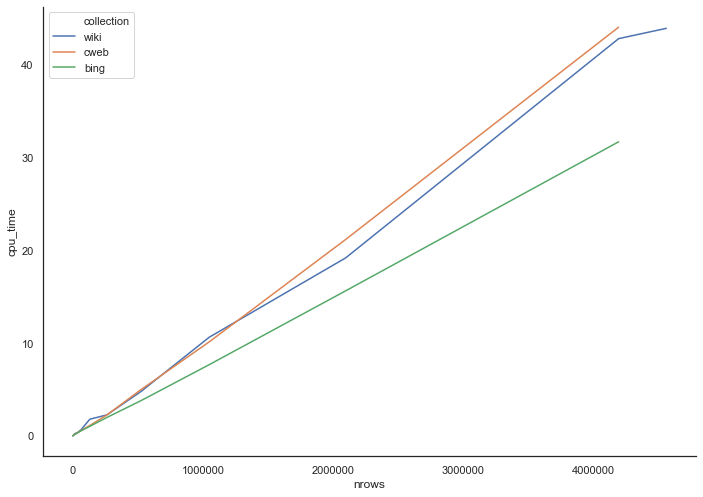

In [17]:
plot_buildtime_nrows(combined_build, 'BuildDAWG')

## As a Facet grid

In [18]:
slice_df = combined_build[(combined_build.nrows <= 5000000)]

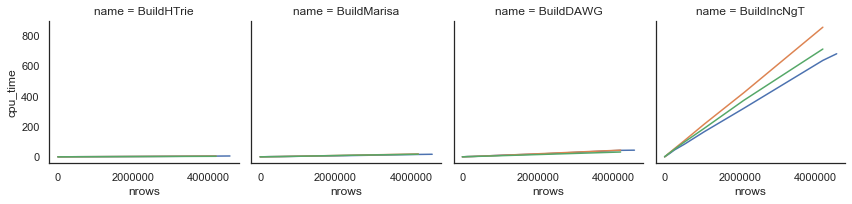

In [19]:
grid = sns.FacetGrid(slice_df, col="name")
grid.map(sns.lineplot, "nrows", "cpu_time", "collection")

#### Hard to manage the scales. Each implementation has order og magnitude difference. It is better to plot them on seperate plots.

# As a class implementation

In [50]:
class MyPlt:
    """ Custom class encapsulating various plotting functions.
    """
    BING_LOG_LABEL = r'{\tt Bing-QAC-2018}'
    WIKI_LOG_LABEL = r'{\tt Wiki-Synth}'
    CWEB_LOG_LABEL = r'{\tt CWeb-Synth}'
    BING_COLL_LABEL = r'{\tt Bing-Collection}'
    WIKI_COLL_LABEL = r'{\tt Wiki-Clickstream}'
    CWEB_COLL_LABEL = r'{\tt ClueWeb-09}'


    TEX_LASTP = r' ($\mbox{\sf{FinalP}}$)'
    BING_LP_LABEL = BING_LOG_LABEL + TEX_LASTP
    WIKI_LP_LABEL = WIKI_LOG_LABEL + TEX_LASTP
    CWEB_LP_LABEL = CWEB_LOG_LABEL + TEX_LASTP

    WIKI_COLOR = '#486824'
    CWEB_COLOR = '#F2C057'
    BING_COLOR = '#D13525'
    PALETTE_ = [WIKI_COLOR, CWEB_COLOR, BING_COLOR]
    # Old colors
    COLOR2 = '#00a5c6'
    COLOR1 = '#b2d800'
    COLOR4 = '#fb6542'
    COLOR3 = '#ffbb00'
    
    _DIR_PATH = '../export/images/'
    _TEST_DIR_PATH = '../test/images/'
    _AX_LABEL_SIZE = 36
    _TICK_LABEL_SIZE = 28
    _LEGEND_LABEL_SIZE = 26
    _LINE_WIDTH = 6
    _DASHL_WIDTH = 5
    _MARKER_SIZE = _LINE_WIDTH + 10
    _dev_run = False

    @staticmethod
    def _initialise_plot():
        sns.set(rc={
                    'figure.figsize': (11.7, 8.27),
                    'text.usetex' : True },
                style="white",
                color_codes=True)
        plt.rc('pdf', fonttype=42) # Embed font

    @staticmethod
    def _save_and_clear(outfile, despine=True):
        plt.tight_layout()
        if despine:
            sns.despine()
        if MyPlt._dev_run:
            plt.savefig(MyPlt._TEST_DIR_PATH + outfile, dpi=100)
        else:
            plt.savefig(MyPlt._DIR_PATH + outfile, dpi=100)

        plt.clf()  # Clear the current plot
        
    @staticmethod
    def plot_buildtime_nrows(combined_build, impl, outfile, cutoff_nrows=None,
                             xlabel="Collection size", ylabel="Build time"):
        from matplotlib.ticker import MultipleLocator, FuncFormatter
        MyPlt._initialise_plot()
        if cutoff_nrows == None: 
            cutoff_nrows = combined_build.groupby(combined_build.collection)['nrows'].agg(max).min()
        slice_df = combined_build[(combined_build.name == impl)
                    & (combined_build.nrows <= cutoff_nrows)]

        colors = [MyPlt.WIKI_COLOR, MyPlt.CWEB_COLOR, MyPlt.BING_COLOR]
        sns.set_palette(sns.color_palette(colors))
        
        ax = sns.lineplot(x="nrows", y="cpu_time", hue="collection", data=slice_df, 
                          marker="o", alpha=.6)
        ax.set_xscale('log', basex=2)
        ax.set_yscale('log', basey=2)
        ymax = np.log2(combined_build[combined_build.nrows <= cutoff_nrows]['cpu_time'].max())
        ymin = np.log2(combined_build[combined_build.nrows <= cutoff_nrows]['cpu_time'].min())
        ax.set_ylim([2**(ymin-1), 2**(ymax+1)])
        
        plt.xlabel(xlabel, fontsize=MyPlt._AX_LABEL_SIZE)
        plt.ylabel(ylabel, fontsize=MyPlt._AX_LABEL_SIZE)
        plt.xticks(fontsize=MyPlt._TICK_LABEL_SIZE, rotation=0)
        plt.yticks(fontsize=MyPlt._TICK_LABEL_SIZE)
        
        plt.setp(ax.lines,linewidth=MyPlt._LINE_WIDTH)  # set lw for all lines
        plt.setp(ax.lines,markersize=MyPlt._MARKER_SIZE)  # set lw for all lines
        
        leg = plt.legend(loc='upper left', prop={'size': MyPlt._LEGEND_LABEL_SIZE})
        for legobj in leg.legendHandles:
            legobj.set_linewidth(MyPlt._LINE_WIDTH)
        
        leg.get_texts()[0].set_text('Collection')
        for t in leg.get_texts()[1:]:
            if t.get_text() == u'bing':
                t.set_text(MyPlt.BING_COLL_LABEL)
            elif t.get_text() == u'cweb':
                t.set_text(MyPlt.CWEB_COLL_LABEL)
            elif t.get_text() == u'wiki':
                t.set_text(MyPlt.WIKI_COLL_LABEL)
            else:
                raise ValueError('Invalid collection name: ' + str(t))
        plt.tight_layout()
        sns.despine()
        plt.show()
        # MyPlt._save_and_clear(outfile)
        
    @staticmethod
    def plot_barplot(combined_build, outfile, ylabel='Bytes/sec', data='collection'):
        MyPlt._initialise_plot()
        palette = sns.color_palette(MyPlt.PALETTE_)
        
        ax = sns.barplot(x="name", y="TotalBytesRate", hue="collection", 
                    data=combined_build, palette=palette,
                    estimator=np.mean)
        plt.yscale('log', basey=2)
        xlabel = "Implementation"
        plt.xlabel(xlabel, fontsize=MyPlt._AX_LABEL_SIZE)
        plt.ylabel(ylabel, fontsize=MyPlt._AX_LABEL_SIZE)
        plt.xticks(fontsize=MyPlt._TICK_LABEL_SIZE, rotation=0)
        plt.yticks(fontsize=MyPlt._TICK_LABEL_SIZE)
         
        leg = plt.legend(loc='upper right', prop={'size': MyPlt._LEGEND_LABEL_SIZE})
        for legobj in leg.legendHandles:
            legobj.set_linewidth(MyPlt._LINE_WIDTH)
        
        if data == 'collection':
            for t in leg.get_texts():
                if t.get_text() == u'bing':
                    t.set_text(MyPlt.BING_COLL_LABEL)
                elif t.get_text() == u'cweb':
                    t.set_text(MyPlt.CWEB_COLL_LABEL)
                elif t.get_text() == u'wiki':
                    t.set_text(MyPlt.WIKI_COLL_LABEL)
                else:
                    raise ValueError('Invalid collection name: ' + str(t))    

        
        plt.tight_layout()
        sns.despine()
        plt.show()
        

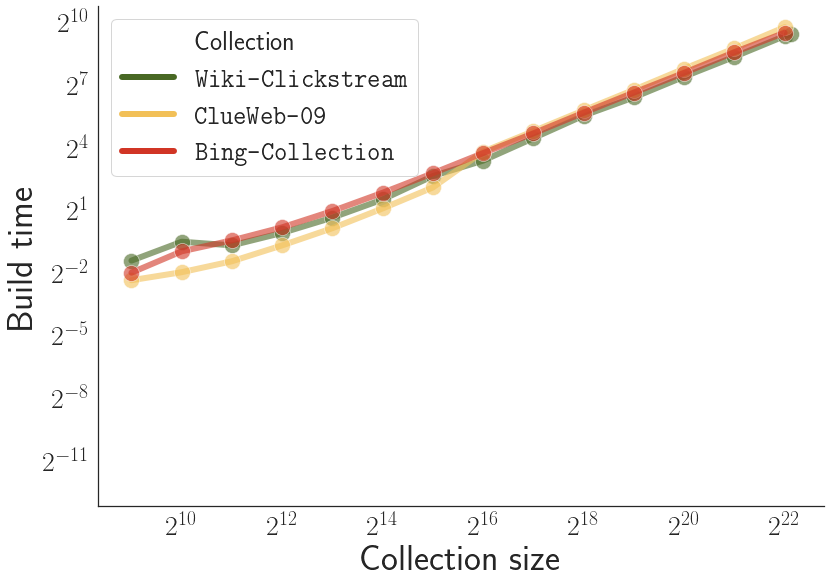

In [51]:
MyPlt.plot_buildtime_nrows(combined_build, 'BuildIncNgT', 'dawg-build.pdf')

# Bytes Rate

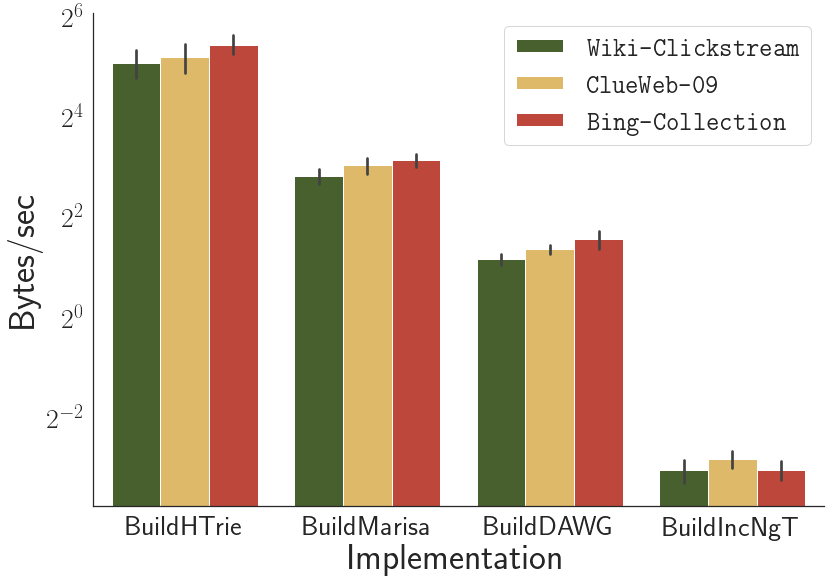

In [22]:
MyPlt.plot_barplot(combined_build, 'None')

In [23]:
combined_build.groupby(['collection', 'name'])['TotalBytesRate'].describe()

count       mean        std        min        25%  \
collection name                                                             
bing       BuildDAWG     16.0   2.959415   0.737692   1.822176   2.309878   
           BuildHTrie    16.0  43.285835  11.953431  29.737186  31.857181   
           BuildIncNgT   16.0   0.122273   0.035003   0.053629   0.108250   
           BuildMarisa   16.0   8.856055   1.687935   6.068478   7.240345   
cweb       BuildDAWG     19.0   2.569287   0.375270   1.939650   2.384524   
           BuildHTrie    19.0  36.557408  16.671139  20.980167  23.030376   
           BuildIncNgT   17.0   0.142027   0.037433   0.071548   0.127539   
           BuildMarisa   19.0   8.227253   2.147776   5.256567   5.980792   
wiki       BuildDAWG     15.0   2.237573   0.348142   1.503611   2.182641   
           BuildHTrie    15.0  33.619423  13.254419  17.056179  23.272514   
           BuildIncNgT   15.0   0.121968   0.041435   0.032559   0.114813   
           BuildMarisa   15.0   7.071991   1.525202   4.671345   6.057901   

                              50%        75%        max  
collection name                                          
bing       BuildDAWG     3.183403   3.524206   4.014597  
           BuildHTrie   39.930487  53.788543  60.707474  
           BuildIncNgT   0.133568   0.146280   0.162328  
           BuildMarisa   9.750757  10.153770  10.616493  
cweb       BuildDAWG     2.642984   2.817011   3.105927  
           BuildHTrie   25.544643  53.906441  64.000320  
           BuildIncNgT   0.129876   0.151629   0.210000  
           BuildMarisa   8.442326  10.270691  10.851955  
wiki       BuildDAWG     2.293711   2.455139   2.708445  
           BuildHTrie   32.509995  42.144918  56.085300  
           BuildIncNgT   0.137924   0.149627   0.156853  
           BuildMarisa   6.917048   8.423662   9.371748

In [24]:
np.log2(43)

5.426264754702098

In [27]:
cutoff_nrows = combined_build.groupby(combined_build.collection)['nrows'].agg(max).min()
slice_df = combined_build[(combined_build.nrows <= cutoff_nrows)]
np.log2(slice_df.cpu_time.max())

9.740782555166184